<a href="https://colab.research.google.com/github/jajapuramshivasai/projects/blob/main/quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym yfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=67cfdf8644084294ae1642e9885cfde83158951c7b21f8bc234fc9e4834d6ad4
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [2]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import gym
import yfinance as yf
import ta   # ta documentation: https://technical-analysis-library-in-python.readthedocs.io/en/latest/
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style("darkgrid")

In [3]:
tickers = "^GSPC"  #"^GSPC" S&P500
df = yf.download(tickers = tickers ,       # list of tickers
                  period = "2y",         # time period
                  interval = "1h",       # trading interval
                  ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                  prepost = False)       # download pre/post market hours data?
print("shape of dataset: ",df.shape)
df.head()


[*********************100%%**********************]  1 of 1 completed
shape of dataset:  (3509, 6)


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-09-30 09:30:00,4370.669922,4382.549805,4362.700195,4367.100098,4367.100098,0
2021-09-30 10:30:00,4367.100098,4368.009766,4350.399902,4362.569824,4362.569824,266238944
2021-09-30 11:30:00,4362.580078,4362.580078,4316.850098,4320.310059,4320.310059,251833780
2021-09-30 12:30:00,4320.080078,4337.149902,4315.450195,4324.930176,4324.930176,207557425
2021-09-30 13:30:00,4324.899902,4346.959961,4320.240234,4341.939941,4341.939941,193786000


In [4]:
split_line = int(np.round(len(df)* 0.1)) # use 10% of data for testing

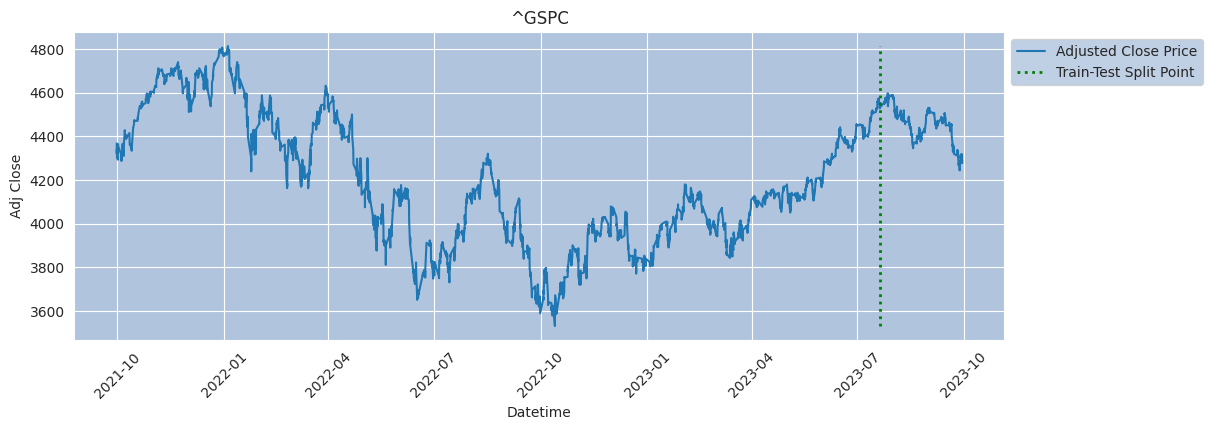

In [5]:
# Get min and max of 'Adj Close'
adj_close_min = df['Adj Close'].min()
adj_close_max = df['Adj Close'].max()

# Set the background color
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.figure(figsize=(12,4))

# Create line plot
sns.lineplot(data=df["Adj Close"],label = "Adjusted Close Price")
plt.xticks(rotation=45)
plt.title(tickers)

# single vline with full ymin and ymax
plt.vlines(x=df.index[-split_line], ymin=adj_close_min, ymax=adj_close_max, colors='green', ls=':', lw=2, label='Train-Test Split Point')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


In [6]:
df['EMA7'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 7, fillna= False).ema_indicator()
df['EMA14'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 14, fillna= False).ema_indicator()
df['EMA50'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 50, fillna= False).ema_indicator()
df['EMA200'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 50, fillna= False).ema_indicator()

Text(0.5, 1.0, '^GSPC')

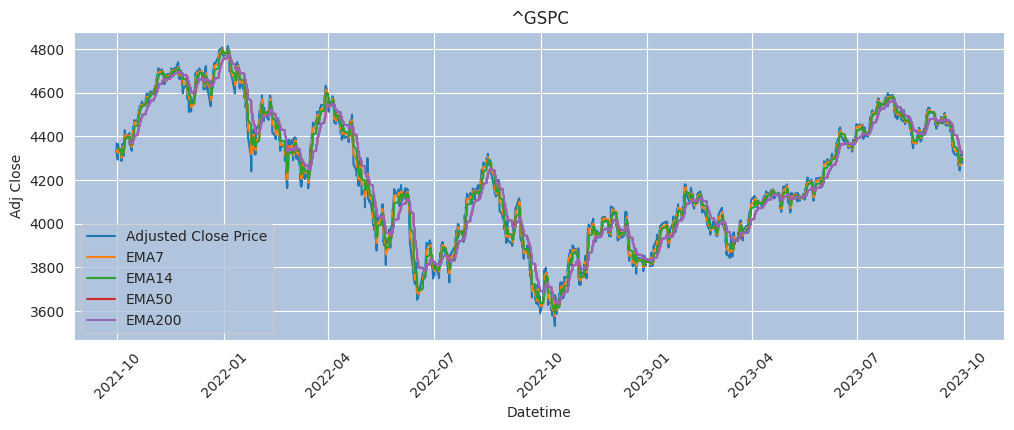

In [7]:
# Set the background color
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.figure(figsize=(12,4))

# Create line plot
sns.lineplot(data=df["Adj Close"],label = "Adjusted Close Price")
sns.lineplot(data=df["EMA7"],label = "EMA7")
sns.lineplot(data=df["EMA14"],label = "EMA14")
sns.lineplot(data=df["EMA50"],label = "EMA50")
sns.lineplot(data=df["EMA200"],label = "EMA200")


plt.xticks(rotation=45)
plt.title(tickers)

In [8]:
df['MACD_line'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd()
df['MACD_signal'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd_signal()
df['MACD_diff'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd_diff()

In [9]:
df['RSI']=ta.momentum.RSIIndicator(close= df['Adj Close'], window= 14, fillna= False).rsi()

In [10]:
# adding Volumn indicator
df['OBV']= ta.volume.OnBalanceVolumeIndicator(close= df['Adj Close'], volume= df['Volume'], fillna = False).on_balance_volume()
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA7,EMA14,EMA50,EMA200,MACD_line,MACD_signal,MACD_diff,RSI,OBV
Datetime,,,,,,,,,,,,,,,
2021-09-30 09:30:00,4370.669922,4382.549805,4362.700195,4367.100098,4367.100098,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-09-30 10:30:00,4367.100098,4368.009766,4350.399902,4362.569824,4362.569824,266238944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-266238944
2021-09-30 11:30:00,4362.580078,4362.580078,4316.850098,4320.310059,4320.310059,251833780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-518072724
2021-09-30 12:30:00,4320.080078,4337.149902,4315.450195,4324.930176,4324.930176,207557425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-310515299
2021-09-30 13:30:00,4324.899902,4346.959961,4320.240234,4341.939941,4341.939941,193786000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116729299


In [11]:
df['BBH']=ta.volatility.BollingerBands(df['Adj Close'], window = 20, window_dev = 2, fillna = False).bollinger_hband_indicator()
df['BBL']=ta.volatility.BollingerBands(df['Adj Close'], window = 20, window_dev = 2, fillna = False).bollinger_lband_indicator()
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA7,EMA14,EMA50,EMA200,MACD_line,MACD_signal,MACD_diff,RSI,OBV,BBH,BBL
Datetime,,,,,,,,,,,,,,,,,
2021-09-30 09:30:00,4370.669922,4382.549805,4362.700195,4367.100098,4367.100098,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
2021-09-30 10:30:00,4367.100098,4368.009766,4350.399902,4362.569824,4362.569824,266238944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-266238944,0.0,0.0
2021-09-30 11:30:00,4362.580078,4362.580078,4316.850098,4320.310059,4320.310059,251833780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-518072724,0.0,0.0
2021-09-30 12:30:00,4320.080078,4337.149902,4315.450195,4324.930176,4324.930176,207557425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-310515299,0.0,0.0
2021-09-30 13:30:00,4324.899902,4346.959961,4320.240234,4341.939941,4341.939941,193786000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116729299,0.0,0.0


In [12]:
df=df.dropna()
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'],axis=1)
df.head()

,Adj Close,EMA7,EMA14,EMA50,EMA200,MACD_line,MACD_signal,MACD_diff,RSI,OBV,BBH,BBL
Datetime,,,,,,,,,,,,
2021-10-11 09:30:00,4415.100098,4402.244467,4396.722105,4371.370648,4371.370648,14.245149,15.670204,-1.425054,60.875340,-1443077525,0.0,0.0
2021-10-11 10:30:00,4407.779785,4403.628296,4398.196462,4372.798458,4372.798458,13.913086,15.318780,-1.405694,57.945164,-1649776075,0.0,0.0
2021-10-11 11:30:00,4400.089844,4402.743683,4398.448913,4373.868708,4373.868708,12.880926,14.831209,-1.950283,54.952761,-1823632763,0.0,0.0
2021-10-11 12:30:00,4378.339844,4396.642723,4395.767704,4374.044047,4374.044047,10.190420,13.903052,-3.712631,47.483667,-1995926760,0.0,0.0
2021-10-11 13:30:00,4379.020020,4392.237047,4393.534679,4374.239183,4374.239183,8.020603,12.726562,-4.705959,47.722964,-1842433557,0.0,0.0


In [13]:
train_data = df.iloc[:-split_line,:]
test_data = df.iloc[-split_line:,:]
input_shape= train_data.shape[1]
print(input_shape)
print('Training data:',train_data.shape)
print('Testing data',test_data.shape)

12
Training data: (3109, 12)
Testing data (351, 12)


In [14]:
import gym
import numpy as np

class StockTradingEnv(gym.Env):
    def __init__(self, data, initial_cash=10000, commission=0.000):
        # Define the action space as a 2D vector representing the action type (buy or sell) and number of shares to trade
        self.action_space = gym.spaces.MultiDiscrete([3, 10])  # [action, number of shares]

        # Define the observation space as a X-D vector containing various indicators of the stock price
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(12,), dtype=np.float32)

        # Store the historical stock data, initial cash balance, and commission rate as instance variables
        self.data = data
        self.initial_cash = initial_cash
        self.commission = commission
        self.end_step = len(self.data) - 1

        # Reset the environment to its initial state
        self.reset()

    def reset(self):
        # Set the current step to 0 and reset the state variables
        self.current_step = 0
        self.profits = 0
        self.shares_held = 0
        self.cash = self.initial_cash
        self.buy_price = 0
        self.sell_price = 0
        self.done = False

        # Return the initial observation
        return self._get_obs()

    def step(self, action):
        action_type, amount = action

        if action_type == 0:
            cost = self.data['Adj Close'][self.current_step] * amount
            if self.cash >= cost:
                self.cash -= cost
                self.shares_held += amount
                self.buy_price = self.data['Adj Close'][self.current_step]
        elif action_type == 1:
            shares_sold = min(self.shares_held, amount)
            revenue = self.data['Adj Close'][self.current_step] * shares_sold
            self.cash += revenue
            self.profits += (self.data['Adj Close'][self.current_step] - self.buy_price) * shares_sold
            self.shares_held -= shares_sold
            self.sell_price = self.data['Adj Close'][self.current_step]

        self.current_step += 1

        # Calculate the total portfolio value
        portfolio_value = self.cash + (self.shares_held * self.data['Adj Close'][self.current_step])

        # Calculate the reward based on the change in portfolio value at each stept
        reward = portfolio_value - (self.cash + (self.shares_held * self.data['Adj Close'][self.current_step - 1]))
        done = (self.current_step == self.end_step)
        return self._get_obs(), reward, done, {}


    def _get_obs(self):




        obs = np.array([
            self.data['Adj Close'][self.current_step],
            self.data['EMA7'][self.current_step],
            self.data['EMA14'][self.current_step],
            self.data['EMA50'][self.current_step],
            self.data['EMA200'][self.current_step],
            self.data['MACD_line'][self.current_step],
            self.data['MACD_signal'][self.current_step],
            self.data['MACD_diff'][self.current_step],
            self.data['RSI'][self.current_step],
            self.data['OBV'][self.current_step],
            self.data['BBH'][self.current_step],
            self.data['BBL'][self.current_step],
        ])




        # Return the observation vector
        return obs


In [15]:
import gym
import numpy as np

class StockTradingEnv(gym.Env):
    def __init__(self, data, initial_cash=10000, commission=0.000):
        # Define the action space as a 2D vector representing the action type (buy or sell) and number of shares to trade
        self.action_space = gym.spaces.MultiDiscrete([3, 10])  # [action, number of shares]

        # Define the observation space as a X-D vector containing various indicators of the stock price
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(12,), dtype=np.float32)

        # Store the historical stock data, initial cash balance, and commission rate as instance variables
        self.data = data
        self.initial_cash = initial_cash
        self.commission = commission
        self.end_step = len(self.data) - 1

        # Reset the environment to its initial state
        self.reset()

    def reset(self):
        # Set the current step to 0 and reset the state variables
        self.current_step = 0
        self.profits = 0
        self.shares_held = 0
        self.cash = self.initial_cash
        self.buy_price = 0
        self.sell_price = 0
        self.done = False

        # Return the initial observation
        return self._get_obs()

    def step(self, action):
        action_type, amount = action

        if action_type == 0:
            cost = self.data['Adj Close'][self.current_step] * amount
            if self.cash >= cost:
                self.cash -= cost
                self.shares_held += amount
                self.buy_price = self.data['Adj Close'][self.current_step]
        elif action_type == 1:
            shares_sold = min(self.shares_held, amount)
            revenue = self.data['Adj Close'][self.current_step] * shares_sold
            self.cash += revenue
            self.profits += (self.data['Adj Close'][self.current_step] - self.buy_price) * shares_sold
            self.shares_held -= shares_sold
            self.sell_price = self.data['Adj Close'][self.current_step]

        self.current_step += 1

        # Calculate the total portfolio value
        portfolio_value = self.cash + (self.shares_held * self.data['Adj Close'][self.current_step])

        # Calculate the reward based on the change in portfolio value at each stept
        reward = portfolio_value - (self.cash + (self.shares_held * self.data['Adj Close'][self.current_step - 1]))
        done = (self.current_step == self.end_step)
        return self._get_obs(), reward, done, {}


    def _get_obs(self):




        obs = np.array([
            self.data['Adj Close'][self.current_step],
            self.data['EMA7'][self.current_step],
            self.data['EMA14'][self.current_step],
            self.data['EMA50'][self.current_step],
            self.data['EMA200'][self.current_step],
            self.data['MACD_line'][self.current_step],
            self.data['MACD_signal'][self.current_step],
            self.data['MACD_diff'][self.current_step],
            self.data['RSI'][self.current_step],
            self.data['OBV'][self.current_step],
            self.data['BBH'][self.current_step],
            self.data['BBL'][self.current_step],
        ])




        # Return the observation vector
        return obs

In [16]:
import random
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

class DQNAgent:
    def __init__(self, state_size, action_space,memory_size=3000):
        # Initialize instance variables
        self.state_size = state_size
        self.action_space = action_space
        self.action_size = action_space.nvec.prod()
        self.memory = deque(maxlen=memory_size)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.01
        self.model = self._build_model()

    def _build_model(self):
        # Build the neural network model
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.action_size, activation='relu'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        # Store the experience in memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Choose an action using the epsilon-greedy strategy
        if np.random.rand() <= self.epsilon:
            return (random.randrange(self.action_space.nvec[0]), random.randrange(self.action_space.nvec[1]))
        act_values = self.model.predict(state)
        return np.unravel_index(np.argmax(act_values[0]), self.action_space.nvec)

    def replay(self, batch_size):
        # Train the model using random samples from memory
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                # Update target value for non-terminal states
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)

            # Convert the action tuple to a linear index
            action_idx = np.ravel_multi_index(action, self.action_space.nvec)

            # Update the target value for the chosen action
            target_f[0][action_idx] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        # Decay the exploration rate if it's above the minimum threshold
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
# Load the stock data
data = train_data

# Create the environment
env = StockTradingEnv(data)
state_size = env.observation_space.shape[0]
action_size = env.action_space.nvec.prod()

# Create and train the agent
agent = DQNAgent(state_size, env.action_space)
episodes = 100
batch_size = 32

for e in tqdm(range(episodes)):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    while True:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        next_state = np.reshape(next_state, [1, state_size])

        agent.remember(state, action, reward, next_state, done)
        state = next_state

        if done:
            print(f'Episode: {e + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2}')
            break

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)


  0%|          | 0/100 [00:00<?, ?it/s]

Episode: 1/100, Total Reward: 127.3349609375, Epsilon: 1.0
1/1 [==============================] - 0s 22ms/step


  1%|          | 1/100 [00:08<14:03,  8.52s/it]

1/1 [==============================] - 0s 21ms/step
Episode: 2/100, Total Reward: 249.421630859375, Epsilon: 0.99
1/1 [==============================] - 0s 35ms/step


  2%|▏         | 2/100 [00:16<13:06,  8.03s/it]

1/1 [==============================] - 0s 19ms/step
Episode: 3/100, Total Reward: -142.35400390625, Epsilon: 0.99
1/1 [==============================] - 0s 20ms/step


  3%|▎         | 3/100 [00:23<12:46,  7.90s/it]

1/1 [==============================] - 0s 29ms/step
Episode: 4/100, Total Reward: -291.26904296875, Epsilon: 0.99
1/1 [==============================] - 0s 19ms/step


  4%|▍         | 4/100 [00:34<13:59,  8.75s/it]

1/1 [==============================] - 0s 20ms/step
Episode: 5/100, Total Reward: -177.23828125, Epsilon: 0.98
1/1 [==============================] - 0s 20ms/step


  5%|▌         | 5/100 [00:45<15:24,  9.74s/it]

1/1 [==============================] - 0s 19ms/step
Episode: 6/100, Total Reward: 486.541015625, Epsilon: 0.98
1/1 [==============================] - 0s 21ms/step


  6%|▌         | 6/100 [00:58<16:47, 10.72s/it]

1/1 [==============================] - 0s 29ms/step
Episode: 7/100, Total Reward: 412.07177734375, Epsilon: 0.97
1/1 [==============================] - 0s 20ms/step


  7%|▋         | 7/100 [01:12<18:27, 11.91s/it]

1/1 [==============================] - 0s 22ms/step
Episode: 8/100, Total Reward: 703.699462890625, Epsilon: 0.97
1/1 [==============================] - 0s 23ms/step


  8%|▊         | 8/100 [01:28<20:19, 13.26s/it]

1/1 [==============================] - 0s 25ms/step
Episode: 9/100, Total Reward: -323.56689453125, Epsilon: 0.96
1/1 [==============================] - 0s 23ms/step


  9%|▉         | 9/100 [01:44<21:33, 14.21s/it]

1/1 [==============================] - 0s 22ms/step
Episode: 10/100, Total Reward: -635.35205078125, Epsilon: 0.96
1/1 [==============================] - 0s 20ms/step


 10%|█         | 10/100 [02:01<22:23, 14.93s/it]

1/1 [==============================] - 0s 19ms/step
Episode: 11/100, Total Reward: -257.34033203125, Epsilon: 0.95
1/1 [==============================] - 0s 34ms/step


 11%|█         | 11/100 [02:21<24:39, 16.63s/it]

1/1 [==============================] - 0s 22ms/step
Episode: 12/100, Total Reward: -799.678466796875, Epsilon: 0.95
1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 12/100 [02:42<26:19, 17.95s/it]

1/1 [==============================] - 0s 20ms/step


In [ ]:
import matplotlib.pyplot as plt

# Load the test data
test_data = test_data.iloc[:,:]

# change this to 1 to get records of all transactions
verbose = 0

# Create the test environment
test_env = StockTradingEnv(test_data, initial_cash=10000)

# Test the agent
state = test_env.reset()
state = np.reshape(state, [1, state_size])
total_reward = 0

# Initialize lists to store the buy and sell prices and the corresponding time steps
buy_prices = []
buy_times = []
sell_prices = []
sell_times = []

# Initialize the list to store portfolio values and add the initial portfolio value
portfolio_values = [test_env.cash]

while True:
    action = agent.act(state)
    next_state, reward, done, _ = test_env.step(action)

    # Calculate the total portfolio value
    portfolio_value = test_env.cash + (test_env.shares_held * test_env.data['Adj Close'][test_env.current_step])
    portfolio_values.append(portfolio_value)

    # Print the action details
    action_type, shares = action
    if(verbose ==1):
        if action_type == 0:
            print(f"Buy {shares} shares at price {test_env.data['Adj Close'][test_env.current_step]}")
        elif action_type == 1:
            print(f"Sell {shares} shares at price {test_env.data['Adj Close'][test_env.current_step]}")

        # Print available cash, number of shares held, and reward
        print(f"Available cash: {test_env.cash}",f",Shares held: {test_env.shares_held}",f",Reward: {reward}")
        print("------------------------------------------------")

    total_reward += reward
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    # Check if a buy action was taken and record the price and time step
    if action[0] == 0:
        buy_prices.append(test_data['Adj Close'][test_env.current_step])
        buy_times.append(test_data.index[test_env.current_step])

    # Check if a sell action was taken and record the price and time step
    elif action[0] == 1:
        sell_prices.append(test_data['Adj Close'][test_env.current_step])
        sell_times.append(test_data.index[test_env.current_step])

    if done:
        print(f'Test: Total Reward: {total_reward}')
        break

# Calculate the percentage change in the portfolio value
portfolio_percentage_changes = [((value - portfolio_values[0]) / portfolio_values[0]) * 100 for value in portfolio_values]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot the historical price data as a line chart on the first subplot
ax1.plot(test_data.index, test_data['Adj Close'])

# Plot the buy and sell actions as red and blue dots, respectively, on the first subplot
ax1.scatter(buy_times, buy_prices, color='b', marker='o', label='Buy')
ax1.scatter(sell_times, sell_prices, color='r', marker='o', label='Sell')

# Set the first subplot's title, x-label, and y-label
ax1.set_title('Trading History')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.legend()

# Plot the percentage change in the portfolio value on the second subplot
ax2.plot(test_data.index, portfolio_percentage_changes, color='g', linestyle='--', label='Portfolio % Change')

# Set the second subplot's title, x-label, and y-label
ax2.set_title('Portfolio Value Change')
ax2.set_xlabel('Time')
ax2.set_ylabel('% Change')
ax2.legend()

# Display the chart
plt.show()


In [ ]:
# Load the test data
test_data = test_data

# Create the test environment
test_env = StockTradingEnv(test_data,initial_cash =100000)

# Define the number of Monte Carlo runs
monte_carlo_runs = 200
rewards = []

for run in tqdm(range(monte_carlo_runs)):
    # Test the agent
    state = test_env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    while True:
        action = agent.act(state)
        next_state, reward, done, _ = test_env.step(action)
        total_reward += reward
        next_state = np.reshape(next_state, [1, state_size])
        state = next_state

        if done:
            print(f'Test Run: {run + 1}/{monte_carlo_runs}, Total Reward: {total_reward}')
            rewards.append(total_reward)
            break

# Calculate and print the average reward
average_reward = np.mean(rewards)
print(f'Average Reward after {monte_carlo_runs} runs: {average_reward}')

In [ ]:
# getting more data
tickers = ["GOOG","IBM","AAPL","META","AMZN"]  #"^GSPC" S&P500
df = yf.download(tickers = tickers ,       # list of tickers
                  period = "2y",         # time period
                  interval = "1h",       # trading interval
                  ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                  prepost = False)       # download pre/post market hours data?
print("shape of dataset: ", df.shape)
df.head()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

split_line = int(np.round(len(df) * 0.1))  # use 10% of data for testing

# Get min and max of 'Adj Close'
adj_close_min = df['Adj Close'].min().min()
adj_close_max = df['Adj Close'].max().max()

# Set the background color
sns.set_style(rc={'axes.facecolor': 'lightsteelblue'})
plt.figure(figsize=(12, 4))

# Loop through each stock in the 'Adj Close' column and plot
# write your code here
for stock in df['Adj Close'].columns:
    sns.lineplot(data=df['Adj Close'][stock], label=f'Adjusted Close Price - {stock}')


plt.xticks(rotation=45)
plt.title(', '.join(df['Adj Close'].columns))

# single vline with full ymin and ymax
plt.vlines(x=df.index[-split_line], ymin=adj_close_min, ymax=adj_close_max, colors='green', ls=':', lw=2, label='Train-Test Split Point')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


In [ ]:
# write you function here
def add_indicators(df):

    df['EMA7'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 7, fillna= False).ema_indicator()
    df['EMA14'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 14, fillna= False).ema_indicator()
    df['EMA50'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 50, fillna= False).ema_indicator()
    df['EMA200'] = ta.trend.EMAIndicator(close= df['Adj Close'], window= 50, fillna= False).ema_indicator()
    df['MACD_line'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd()
    df['MACD_signal'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd_signal()
    df['MACD_diff'] =ta.trend.MACD(close= df['Adj Close'], window_slow= 26, window_fast= 12, window_sign = 9, fillna = False).macd_diff()
    df['RSI']=ta.momentum.RSIIndicator(close= df['Adj Close'], window= 14, fillna= False).rsi()
    df['OBV']= ta.volume.OnBalanceVolumeIndicator(close= df['Adj Close'], volume= df['Volume'], fillna = False).on_balance_volume()
    df['BBH']=ta.volatility.BollingerBands(df['Adj Close'], window = 20, window_dev = 2, fillna = False).bollinger_hband_indicator()
    df['BBL']=ta.volatility.BollingerBands(df['Adj Close'], window = 20, window_dev = 2, fillna = False).bollinger_lband_indicator()
    df=df.dropna()
    df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'],axis=1)

    return df


In [ ]:
# loading individual stock data for every stock and calling add_indicator

df_GOOG = yf.download(tickers = 'GOOG' ,period = "2y", interval = "1h",ignore_tz = True,prepost = False)
df_GOOG = add_indicators(df_GOOG)

df_IBM = yf.download(tickers = 'IBM' ,period = "2y", interval = "1h",ignore_tz = True,prepost = False)
df_IBM = add_indicators(df_IBM)

df_AAPL = yf.download(tickers = 'AAPL' ,period = "2y", interval = "1h",ignore_tz = True,prepost = False)
df_AAPL = add_indicators(df_AAPL)

df_META = yf.download(tickers = 'META' ,period = "2y", interval = "1h",ignore_tz = True,prepost = False)
df_META = add_indicators(df_META)

df_AMZN = yf.download(tickers = 'AMZN' ,period = "2y", interval = "1h",ignore_tz = True,prepost = False)
df_AMZN = add_indicators(df_AMZN)

train_data1 = df_GOOG.iloc[:-split_line,:]
train_data2 = df_IBM.iloc[:-split_line,:]
train_data3 = df_AAPL.iloc[:-split_line,:]
train_data4 = df_META.iloc[:-split_line,:]
train_data5 = df_AMZN.iloc[:-split_line,:]

train_df_list = [train_data1,train_data2,train_data3,train_data4,train_data5]

In [ ]:
# write your code here

import yfinance as yf

tickers = ['GOOG', 'IBM', 'AAPL', 'META', 'AMZN']
train_df_list = []

for ticker in tickers:
    df = yf.download(tickers=ticker, period="2y", interval="1h", ignore_tz=True, prepost=False)
    df = add_indicators(df)
    train_data = df.iloc[:-split_line, :]
    train_df_list.append(train_data)



In [ ]:
'''
training loop to handle multiple dataframes like df_1, df_2, df_3, you can create a list of dataframes and loop through them.
'''
# Load the stock dataframes
data_list = train_df_list

# Create and train the agent
agent = DQNAgent(state_size, env.action_space, memory_size=4000) # increasing the memory size for the agent
episodes = 100
batch_size = 32

for data in data_list:
    env = StockTradingEnv(data)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.nvec.prod()

    for e in tqdm(range(episodes)):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        while True:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_state = np.reshape(next_state, [1, state_size])

            agent.remember(state, action, reward, next_state, done)
            state = next_state

            if done:
                print(f'Episode: {e + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2}')
                break

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)


In [ ]:

from sklearn.preprocessing import MinMaxScaler

class StockTradingEnv(gym.Env):
    # ...

    def _normalize_data(self, data):
        scaler = MinMaxScaler()
        return scaler.fit_transform(data)

    def _get_obs(self):
        # Calculate the observation vector for the current step
        obs = np.array([
            # ...
        ])

        # Normalize the observation vector
        obs = self._normalize_data(obs)

        # Return the observation vector
        return obs

In [ ]:
# using Apple data for testing
test_data = df_AAPL.iloc[-split_line:,:]



# Create the test environment
test_env = StockTradingEnv(test_data,initial_cash =10000)

# Define the number of Monte Carlo runs
monte_carlo_runs = 200
rewards = []

for run in tqdm(range(monte_carlo_runs)):
    # Test the agent
    state = test_env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    while True:
        action = agent.act(state)
        next_state, reward, done, _ = test_env.step(action)
        total_reward += reward
        next_state = np.reshape(next_state, [1, state_size])
        state = next_state

        if done:
            # print(f'Test Run: {run + 1}/{monte_carlo_runs}, Total Reward: {total_reward}')
            rewards.append(total_reward)
            break

# Calculate and print the average reward
average_reward = np.mean(rewards)
print(f'Average Reward after {monte_carlo_runs} runs: {average_reward}')